## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['RANDOM FOREST SAMPLE PARAMETER TUNING.ipynb', '.DS_Store', 'Heart', 'Untitled.ipynb', 'ML_PPT.pptx', 'Heart_disease_prediction.ipynb', 'Heart_Disease_Prediction.csv', '(Base paper)CARDIOVASCULAR_DISEASE_PREDICTION.pdf', 'Keypts.docx', '.jovianrc', 'ML PAPERS', '.ipynb_checkpoints']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("Heart_Disease_Prediction.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(270, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
dataset.sample(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
22,43,1,4,115,303,0,0,181,0,1.2,2,0,3,0
92,54,1,4,124,266,0,2,109,1,2.2,2,1,7,1
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3,1
65,57,1,4,150,276,0,2,112,1,0.6,2,1,6,1
37,59,1,1,160,273,0,2,125,0,0.0,1,0,3,1


#### Description

In [7]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

Age:			age
Sex:			1: male, 0: female
Chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
BP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FBS over 120:			fasting blood sugar > 120 mg/dl
EKG results:			resting electrocardiographic results (values 0,1,2)
Max HR:			 maximum heart rate achieved
Exercise angina:			exercise induced angina
ST depression:			oldpeak = ST depression induced by exercise relative to rest
Slope of ST:			the slope of the peak exercise ST segment
Number of vessels fluro:			number of major vessels (0-3) colored by flourosopy
Thallium:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["Heart Disease"].describe()

count    270.000000
mean       0.444444
std        0.497827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Heart Disease, dtype: float64

In [12]:
dataset["Heart Disease"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["Heart Disease"].abs().sort_values(ascending=False))

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Heart Disease, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

0    150
1    120
Name: Heart Disease, dtype: int64


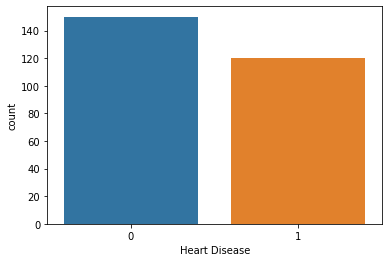

In [14]:
y = dataset["Heart Disease"]

sns.countplot(y)


target_temp = dataset["Heart Disease"].value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 49.5
Percentage of patience with heart problems: 39.6


### We'll analyse 'Sex', 'Chest Pain Type', 'FBS', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro' and 'Thallium' features

### Analysing the 'Sex' feature

In [16]:
dataset["Sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='Sex', ylabel='Heart Disease'>

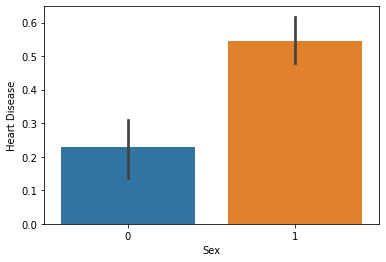

In [17]:
sns.barplot(dataset["Sex"],y)

### Analysing the 'Chest Pain Type' feature

In [18]:
dataset["Chest pain type"].unique()

array([4, 3, 2, 1])

<AxesSubplot:xlabel='Chest pain type', ylabel='Heart Disease'>

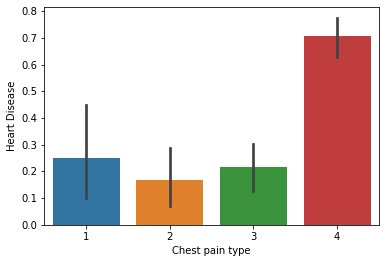

In [19]:
sns.barplot(dataset["Chest pain type"],y)

### Analysing the FBS feature

In [20]:
dataset["FBS over 120"].describe()

count    270.000000
mean       0.148148
std        0.355906
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FBS over 120, dtype: float64

In [21]:
dataset["FBS over 120"].unique()

array([0, 1])

<AxesSubplot:xlabel='FBS over 120', ylabel='Heart Disease'>

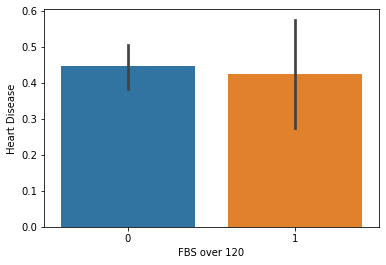

In [22]:
sns.barplot(dataset["FBS over 120"],y)

### Analysing the restecg feature

In [23]:
dataset["EKG results"].unique()

array([2, 0, 1])

<AxesSubplot:xlabel='EKG results', ylabel='Heart Disease'>

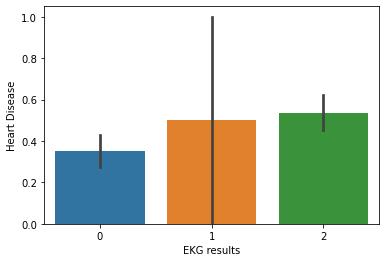

In [24]:
sns.barplot(dataset["EKG results"],y)

### Analysing the 'Exercise angina' feature

In [25]:
dataset["Exercise angina"].unique()

array([0, 1])

<AxesSubplot:xlabel='Exercise angina', ylabel='Heart Disease'>

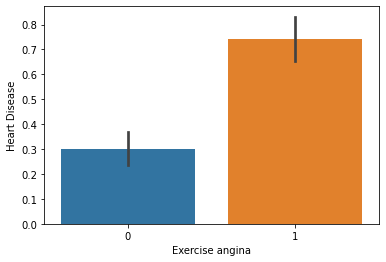

In [26]:
sns.barplot(dataset["Exercise angina"],y)

### Analysing the Slope feature

In [27]:
dataset["Slope of ST"].unique()

array([2, 1, 3])

<AxesSubplot:xlabel='Slope of ST', ylabel='Heart Disease'>

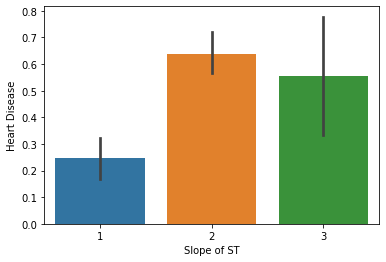

In [28]:
sns.barplot(dataset["Slope of ST"],y)

### Analysing the 'Number of vessels flur' feature

In [29]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
dataset["Number of vessels fluro"].unique()

array([3, 0, 1, 2])

<AxesSubplot:xlabel='Number of vessels fluro', ylabel='count'>

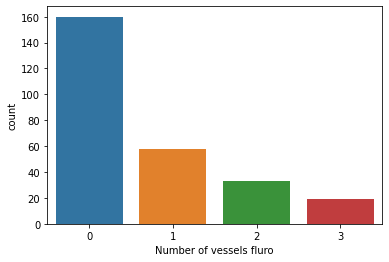

In [31]:
sns.countplot(dataset["Number of vessels fluro"])

<AxesSubplot:xlabel='Number of vessels fluro', ylabel='Heart Disease'>

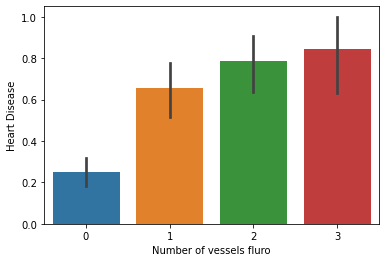

In [32]:
sns.barplot(dataset["Number of vessels fluro"],y)

In [33]:
dataset["Thallium"].unique()

array([3, 7, 6])

<AxesSubplot:xlabel='Thallium', ylabel='Heart Disease'>

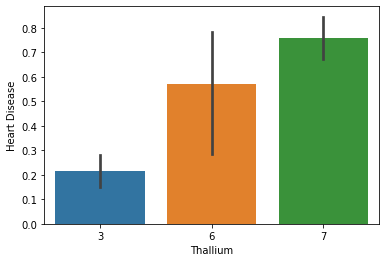

In [34]:
sns.barplot(dataset["Thallium"],y)